# Regression Models Evaluation Metrics

## How to compare Regression Models

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
Image(url='winner.jpg', width=600)

## Table of Contents

* 1. Introduction
* 2. Regression Evaluation Metrics
    * 2.1 Mean Absolute Error (MAE)
    * 2.2 Mean Squared Error (MSE)
    * 2.3 Root Mean Squared Error (RMSE)
    * 2.4 R-squared (Coefficient of determination)
    * 2.5 Adjusted R squared
    * 2.6 Cross-validated R2
    * 2.7 Regression Evaluation Metrics - Conclusion
* 3. Set-up
    * 3.1 Import Libraries
    * 3.2 Defining function for regression metrics
    * 3.3 Data Sets Characteristics
    * 3.4 Import Data
* 4. Some visualisations
    * 4.1 Avocado Prices
    * 4.2 Boston House Prices
* 5. Data pre-processing
    * 5.1 Some transformations
    * 5.2 Outlier detection and removal
    * 5.3 Train test split
    * 5.4 Feature scaling
* 6. Comparing different models
    * 6.1 Linear Regression
    * 6.2 Random Forest
    * 6.3 Ridge Regression
    * 6.4 XGBoost
    * 6.5 Recursive Feature Elimination (RFE)
* 7. Final Model Evaluation
    * 7.1 Avocado dataset
    * 7.2 Boston dataset
    * 7.3 Visualizing Model Performance
* 8. Bonus: hyperparameters Tuning Using GridSearchCV
    * 8.1 Tuned Ridge Regression
* 9. Final performance comparison
    * 9.1 Avocado data set
    * 9.2 Boston data set
* 10. Other notebooks
* 11. Some referrals

# 1. Introduction

Performance metrics are vital for supervised machine learning models. To be sure that your model is doing well in its predictions, you need to evaluate the model. Our goal is to identify how well the model performs on new data.

There are some evaluation metrics that can help you determine whether the model’s predictions are accurate to a certain level of performance. 

# 2. Regression Evaluation Metrics

All of these are **loss functions**, because we want to minimize them.

## 2.1 Mean Absolute Error (MAE) 
is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

## 2.2 Mean Squared Error (MSE) 
is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

## 2.3 Root Mean Squared Error (RMSE) 
is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

RMSE measures the standard deviation of residuals.

## 2.4 R-squared (Coefficient of determination)

1. **SST** (or TSS)

The Sum of Squares Total/Total Sum of Squares (SST or TSS) is the squared differences between the observed dependent variable and its mean.

2. **SSR** (or RSS)

Sum of Squares Regression (SSR or RSS) is the sum of the differences between the predicted value and the mean of the dependent variable.

3. **SSE** (or ESS)

Sum of Squares Error (SSE or ESS) is the difference between the observed value and the predicted value.

In [2]:
Image(url='sst.png', width=450)

The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. When R² is high, it represents that the regression can capture much of variation in observed dependent variables. That’s why we can say the regression model performs well when R² is high.

$$R^2 = 1- \frac {SSR}{SST}$$

It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one. One misconception about regression analysis is that a low R-squared value is always a bad thing. For example, some data sets or fields of study have an inherently greater amount of unexplained variation. In this case, R-squared values are naturally going to be lower. Investigators can make useful conclusions about the data even with a low R-squared value.

$$R^2=1$$ All the variation in the y values is accounted for by the x values.

In [3]:
Image(url='R2=1.jpeg', width=250)

$$R^2=0.83$$
83 % of the variation in the y values is accounted for by the x values.

In [4]:
Image(url='R2=0.8.jpeg', width=250)

$$R^2=0$$ None of the variation in the y values is accounted for by the x values.

In [5]:
Image(url='R2=0.jpeg', width=250)

## 2.5 Adjusted R squared

$$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$$

**Adjusted R squared** is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.

## 2.6 Cross-validated R2

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

**Cross-validated R2** is a median value or R2 taken from cross-validation procedure.

In [6]:
Image(url='CV.png', width=550)

## 2.7 Regression Evaluation Metrics - Conclusion

Both RMSE and R-Squared quantifies how well a linear regression model fits a dataset. When assessing how well a model fits a dataset, it’s useful to calculate both the RMSE and the R2 value because each metric tells us something different.

* **RMSE** tells us the typical distance between the predicted value made by the regression model and the actual value.

* **R2** tells us how well the predictor variables can explain the variation in the response variable.

Adding more independent variables or predictors to a regression model tends to increase the R2 value, which tempts makers of the model to add even more variables. **Adjusted R2** is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables. It is always lower than the R2.

# 3 Set-up

## 3. 1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

## 3.2 Defining function for regression metrics

In [7]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

## 3.3 Data Sets Characteristics

### Avocado Prices

https://www.kaggle.com/datasets/neuromusic/avocado-prices

Some relevant columns in the dataset:

 - Date - The date of the observation

 - AveragePrice - the average price of a single avocado

 - type - conventional or organic

 - year - the year

 - Region - the city or region of the observation

 - Total Volume - Total number of avocados sold

 - 4046 - Total number of avocados with PLU 4046 sold

 - 4225 - Total number of avocados with PLU 4225 sold

 - 4770 - Total number of avocados with PLU 4770 sold
 
Missing values: None

Duplicate entries: None

### Boston House Prices

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

  - CRIM     per capita crime rate by town
  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS    proportion of non-retail business acres per town
  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - NOX      nitric oxides concentration (parts per 10 million)
  - RM       average number of rooms per dwelling
  - AGE      proportion of owner-occupied units built prior to 1940
  - DIS      weighted distances to five Boston employment centres
  - RAD      index of accessibility to radial highways
  - TAX      full-value property-tax rate per 10 000 USD
  - PTRATIO  pupil-teacher ratio by town
  - B        1000 (Bk - 0.63)^2 where Bk is the proportion of black people by town
  - LSTAT    % lower status of the population
  - MEDV     Median value of owner-occupied homes in $1000's

Missing values: None

Duplicate entries: None

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

## 3.4 Import Data

In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

try:
    raw_df1 = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')
    raw_df2 = pd.read_csv('../input/boston-house-prices/housing.csv', header = None, delimiter = r"\s+", names = column_names)
except:
    raw_df1 = pd.read_csv('avocado.csv')
    raw_df2 = pd.read_csv('housing.csv', header = None, delimiter = r"\s+", names = column_names)

In [9]:
# Deleting column
raw_df1 = raw_df1.drop('Unnamed: 0', axis = 1)

In [10]:
numeric_columns = ['AveragePrice', 'Total Volume','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['Region', 'Type']
time_columns = ['Data', 'Year']
numeric_columns_boston = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 4. Some visualisations

## 4.1 Avocado Prices

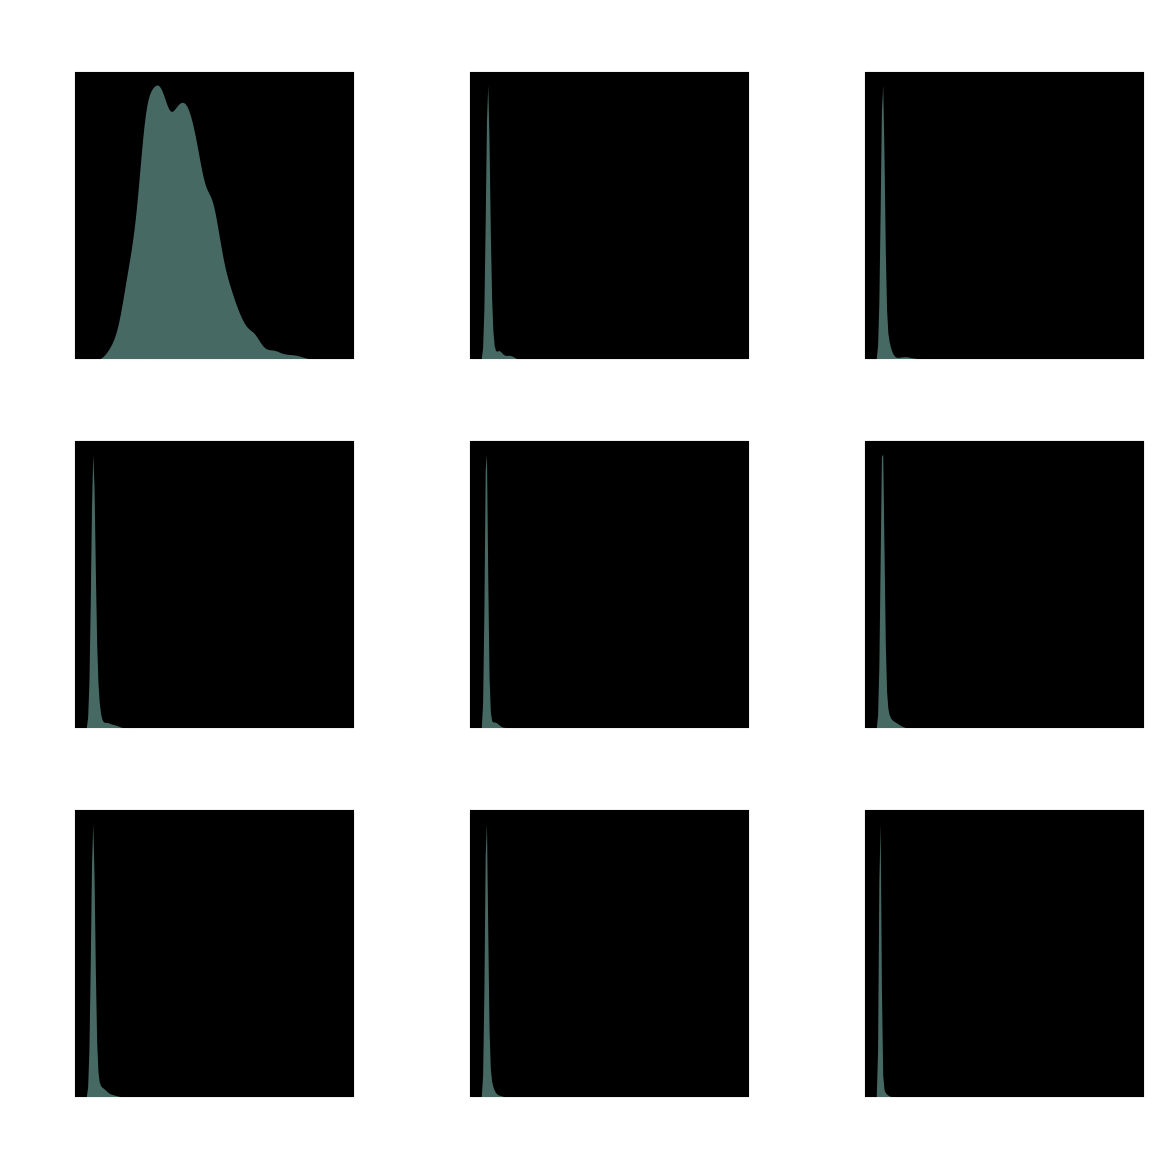

In [11]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=raw_df1, columns_list=numeric_columns, rows=3, cols=3, suptitle='Avocado Prices: distibution for each numeric variable')
plt.tight_layout()

## 4.2 Boston House Prices

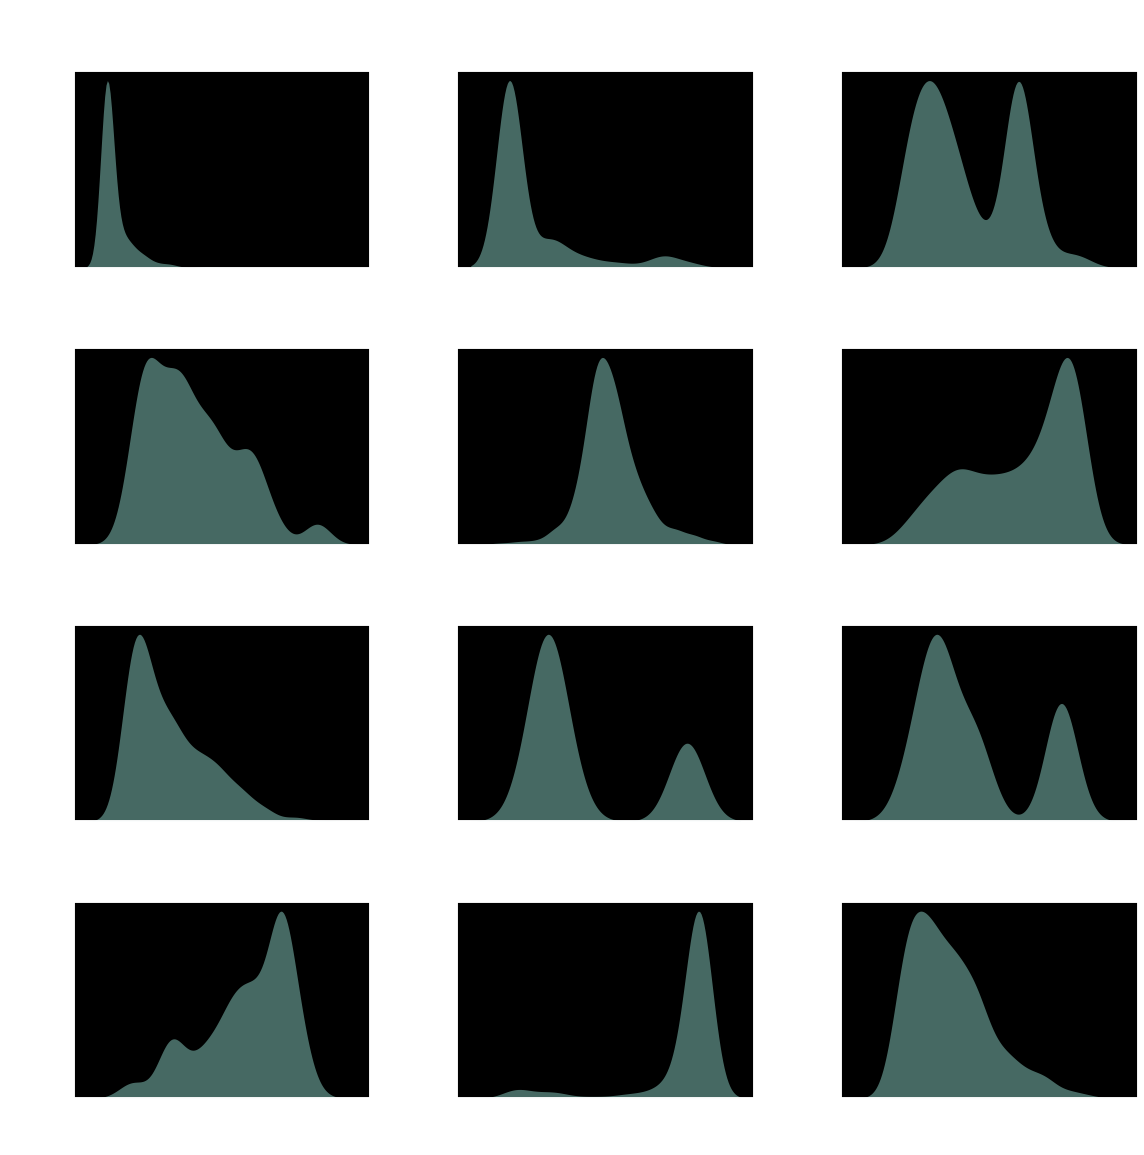

In [12]:
dist_custom(dataset=raw_df2, columns_list=numeric_columns_boston, rows=4, cols=3, suptitle='Boston House Prices: distibution for each numeric variable')
plt.tight_layout()

# 5. Data pre-processing

## 5.1 Some transformations

In [13]:
# Changing data types
for i in raw_df1.columns:
    if i == 'Date':
        raw_df1[i] = raw_df1[i].astype('datetime64[ns]')
    elif raw_df1[i].dtype == 'object':
        raw_df1[i] = raw_df1[i].astype('category')

In [14]:
df1 = raw_df1.copy()

df1['Date'] = pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].dt.month

df1['Spring'] = df1['month'].between(3,5,inclusive='both')
df1['Summer'] = df1['month'].between(6,8,inclusive='both')
df1['Fall'] = df1['month'].between(9,11,inclusive='both')
# df1['Winter'] = df1['month'].between(12,2,inclusive='both')

df1.Spring = df1.Spring.replace({True: 1, False: 0})
df1.Summer = df1.Summer.replace({True: 1, False: 0})
df1.Fall = df1.Fall.replace({True: 1, False: 0})

In [15]:
# Encoding labels for 'type'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])

# Encoding 'region' (One Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
ohe = pd.get_dummies(data=df1, columns=['region'])

df1 = ohe.drop(['Date','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'], axis=1)

## 5.2 Outlier detection and removal

We have a significant problems with outliers in both data sets:

* most of the distributions are not normal;

* huge outliers;

* higly right-skeved data in Avocado Prices data set;

* a lot of outliers.

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

For oulier detection methods look here: https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

In [16]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [17]:
numeric_columns2 = ['Total Volume', 'Total Bags']

Outliers_IQR = IQR_method(df1,1,numeric_columns2)
# dropping outliers
df1 = df1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers: 2533


In [18]:
numeric_columns2 = ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

Outliers_IQR = IQR_method(raw_df2,1,numeric_columns2)
# dropping outliers
df2 = raw_df2.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers: 7


## 5.3 Train test split

In [19]:
X = df1.drop('AveragePrice', axis=1)
y = df1['AveragePrice']

X2 = raw_df2.iloc[:, :-1]
y2 = raw_df2.iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

## 5.4 Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [22]:
col_names = ['Total Volume', 'Total Bags']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train2 = Standard_Scaler (X_train2, col_names)
X_test2 = Standard_Scaler (X_test2, col_names)

# 6. Comparing different models

## 6.1 Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)

### Linear Regression performance for Avocado dataset

In [24]:
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train,y_train,X_test,y_test,y_pred)]

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.598793,0.593598,0.604282,0.255931


Text(0.5, 1.0, 'Linear regression for Avocado dataset')

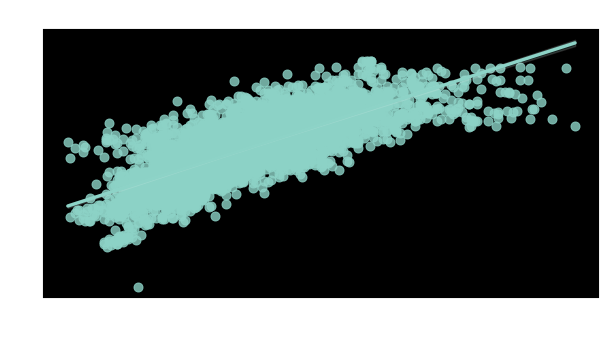

In [25]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression for Avocado dataset', fontsize = 20)

### Linear Regression performance for Boston dataset

In [26]:
lm.fit(X_train2, y_train2)
y_pred = lm.predict(X_test2)

In [27]:
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train2,y_train2,X_test2,y_test2,y_pred)]

lm_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score2.insert(0, 'Model', 'Linear Regression')
lm_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.679168,0.648945,0.687535,4.889394


## 6.2 Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

### Random Forest performance for Avocado dataset

In [29]:
RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

In [30]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.78712,0.784363,0.876525,0.186426


### Random Forest performance for Boston dataset

In [31]:
RandomForest_reg.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test2)

In [32]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train2,y_train2,X_test2,y_test2,y_pred)]

rf_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score2.insert(0, 'Model', 'Random Forest')
rf_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.838576,0.823369,0.817514,3.468169


## 6.3 Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")

### Ridge Regression performance for Avocado dataset

In [34]:
ridge_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

In [35]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,y_pred)]

rr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score.insert(0, 'Model', 'Ridge Regression')
rr_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.598733,0.593537,0.604317,0.25595


### Ridge Regression performance for Boston dataset

In [36]:
ridge_reg.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test2)

In [37]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train2,y_train2,X_test2,y_test2,y_pred)]

rr_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score2.insert(0, 'Model', 'Ridge Regression')
rr_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.678696,0.648428,0.689293,4.892991


## 6.4 XGBoost

In [38]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

### XGBoost performance for Avocado dataset

In [39]:
XGBR.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

In [40]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.795064,0.792411,0.910449,0.182914


### XGBoost performance for Boston dataset

In [41]:
XGBR.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test2)

In [42]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train2,y_train2,X_test2,y_test2,y_pred)]

XGBR_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score2.insert(0, 'Model', 'XGBoost')
XGBR_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.899321,0.889837,0.8469,2.738961


## 6.5 Recursive Feature Elimination (RFE)

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

Random Forest has usually good performance combining with RFE

In [43]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=60)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

### Random Forest RFE performance for Avocado dataset

In [44]:
rf_pipeline.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)

In [45]:
ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train,y_train,X_test,y_test,y_pred)]

rfe_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score.insert(0, 'Model', 'Random Forest with RFE')
rfe_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.802443,0.799885,0.889693,0.179591


### Random Forest RFE performance for Boston dataset

In [46]:
# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=8)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

rf_pipeline.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test2)

In [47]:
ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train2,y_train2,X_test2,y_test2,y_pred)]

rfe_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score2.insert(0, 'Model', 'Random Forest with RFE')
rfe_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.856206,0.84266,0.802484,3.273312


# 7. Final Model Evaluation

## 7.1 Avocado dataset

In [48]:
predictions = pd.concat([rfe_score, XGBR_score, rr_score, rf_score, lm_score], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.802443,0.799885,0.889693,0.179591
1,XGBoost,0.795064,0.792411,0.910449,0.182914
2,Ridge Regression,0.598733,0.593537,0.604317,0.255950
3,Random Forest,0.787120,0.784363,0.876525,0.186426
4,Linear Regression,0.598793,0.593598,0.604282,0.255931


## 7.2 Boston dataset

In [49]:
predictions2 = pd.concat([rfe_score2, XGBR_score2, rr_score2, rf_score2, lm_score2], ignore_index=True, sort=False)
predictions2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.856206,0.842660,0.802484,3.273312
1,XGBoost,0.899321,0.889837,0.846900,2.738961
2,Ridge Regression,0.678696,0.648428,0.689293,4.892991
3,Random Forest,0.838576,0.823369,0.817514,3.468169
4,Linear Regression,0.679168,0.648945,0.687535,4.889394


## 7.3 Visualizing Model Performance

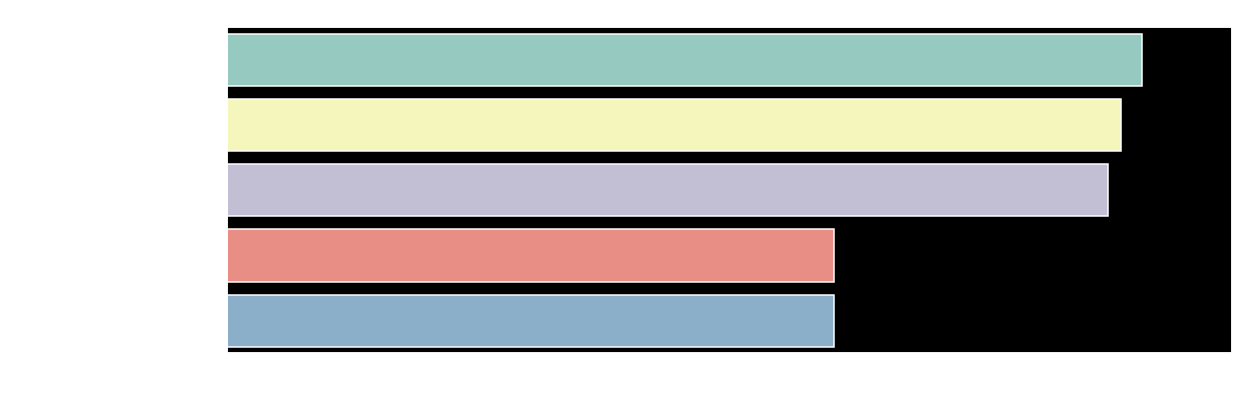

In [58]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance for Avocado dataset')

plt.show()

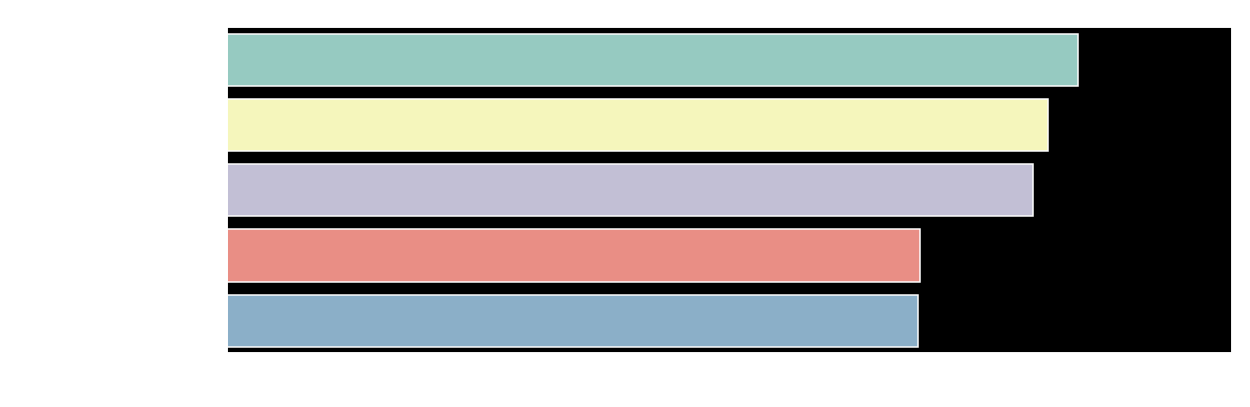

In [59]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions2.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions2, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance for Boston dataset')
plt.show()

# 8. Bonus: hyperparameter Tuning Using GridSearchCV

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us. Machine learning algorithms never learn these parameters. These can be tuned in different step.

GridSearchCV is a technique for finding the optimal hyperparameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

The “best” parameters that GridSearchCV identifies are technically the best that could be produced, but only by the parameters that you included in your parameter grid.

## 8.1 Tuned Ridge Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features are those features created by raising existing features to an exponent. 
# For example, if a dataset had one input feature X, 
# then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2.

steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)

In [53]:
from sklearn.model_selection import GridSearchCV

alpha_params = [{'model__alpha': list(range(1, 15))}]

clf = GridSearchCV(ridge_pipe, alpha_params, cv = 10)

### Tuned Ridge Regression performance for Avocado dataset

In [54]:
# Fit and tune model
clf.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)
# The combination of hyperparameters along with values that give the best performance of our estimate specified
print(clf.best_params_)

{'model__alpha': 1}


In [55]:
ndf = [Reg_Models_Evaluation_Metrics(clf,X_train,y_train,X_test,y_test,y_pred)]

clf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
clf_score.insert(0, 'Model', 'Tuned Ridge Regression')
clf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.736622,0.733212,0.739008,0.210438


### Tuned Ridge Regression performance for Boston dataset

In [61]:
steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train2, y_train2)

# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test2)

alpha_params = [{'model__alpha': list(range(1, 15))}]

clf = GridSearchCV(ridge_pipe, alpha_params, cv = 10)
# Fit and tune model
clf.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test2)
# The combination of hyperparameters along with values that give the best performance of our estimate specified
print(clf.best_params_)

{'model__alpha': 12}


In [62]:
ndf = [Reg_Models_Evaluation_Metrics(clf,X_train2,y_train2,X_test2,y_test2,y_pred)]

clf_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
clf_score2.insert(0, 'Model', 'Tuned Ridge Regression')
clf_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.793267,0.773792,0.844628,3.965999


# 9. Final performance comparison

## 9.1 Avocado data set

In [63]:
result = pd.concat([clf_score, predictions], ignore_index=True, sort=False)
result

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.736622,0.733212,0.739008,0.210438
1,XGBoost,0.795064,0.792411,0.910449,0.182914
2,Random Forest with RFE,0.802443,0.799885,0.889693,0.179591
3,Random Forest,0.787120,0.784363,0.876525,0.186426
4,Ridge Regression,0.598733,0.593537,0.604317,0.255950
5,Linear Regression,0.598793,0.593598,0.604282,0.255931


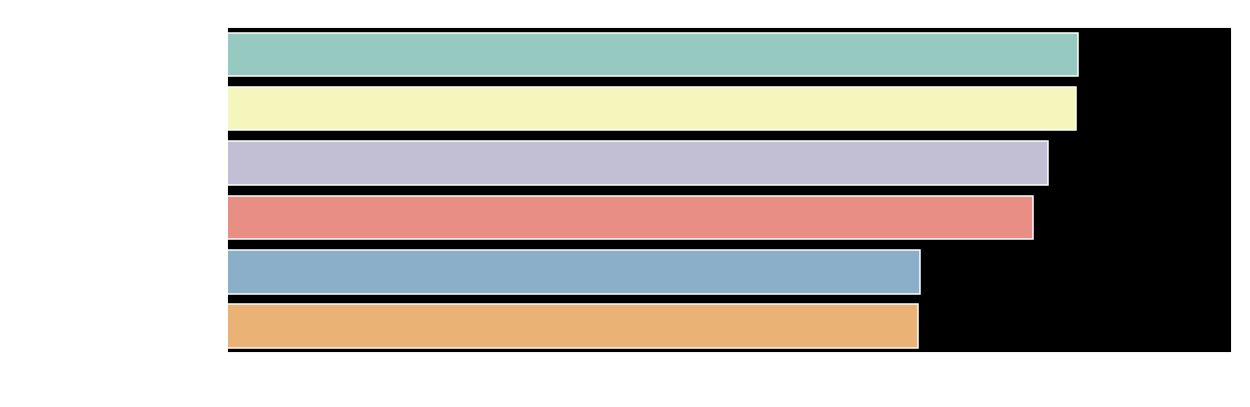

In [67]:
f, axe = plt.subplots(1,1, figsize=(18,6))

result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = result, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set(title='Model Performance for Avocado dataset')

plt.show()

## 9.2 Boston data set

In [65]:
result = pd.concat([clf_score2, predictions2], ignore_index=True, sort=False)
result

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.793267,0.773792,0.844628,3.965999
1,XGBoost,0.899321,0.889837,0.846900,2.738961
2,Random Forest,0.838576,0.823369,0.817514,3.468169
3,Random Forest with RFE,0.856206,0.842660,0.802484,3.273312
4,Ridge Regression,0.678696,0.648428,0.689293,4.892991
5,Linear Regression,0.679168,0.648945,0.687535,4.889394


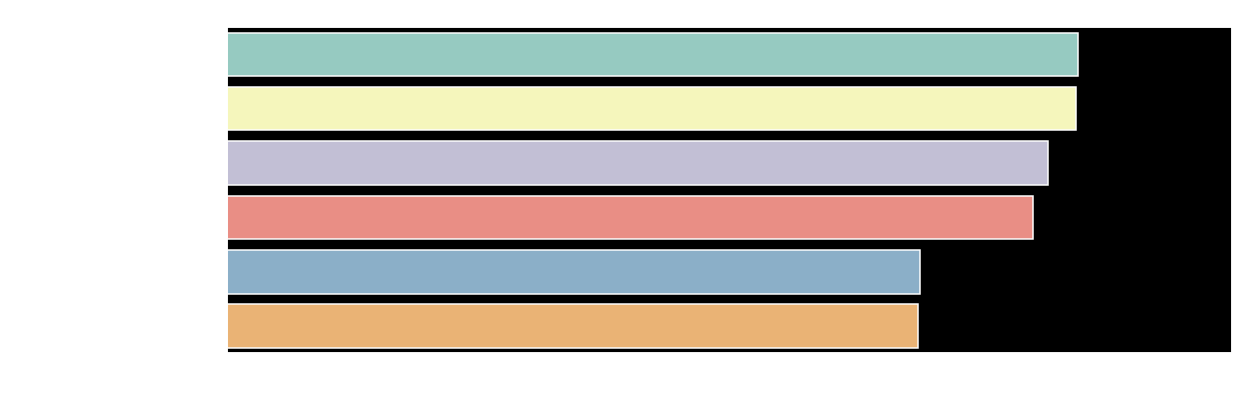

In [68]:
f, axe = plt.subplots(1,1, figsize=(18,6))

result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = result, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set(title='Model Performance for Boston dataset')

plt.show()

# 10. Other notebooks

Clustering methods - comprehensive study

https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study

Outlier detection methods!

https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

Multicollinearity - detection and remedies

https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies

# 11. Some referrals

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html